## SVD  imagenes 

1. Svd de una imagen en grayscale.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from skimage.viewer import ImageViewer
from numpy import linalg
import numpy as np


/usr/local/lib/python3.5/dist-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


In [25]:
matrix = io.imread('face.png', as_grey=True)
print(matrix.shape)

(768, 1024)


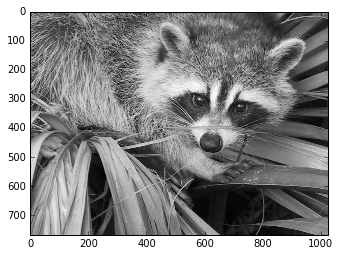

In [4]:
#### La clase image viewer te permite ver imagenes
#viewer = ImageViewer(img)
#viewer.show()

plt.imshow(matrix, cmap='gray')
plt.show()

Ahora la descomponemos en SVD. 

In [26]:
matrix.shape

(768, 1024)

In [27]:
u, s, vt = linalg.svd(matrix, full_matrices=False)
print(u.shape)
S = np.diag(s)
print(S.shape)
print(vt.shape)


(768, 768)
(768, 768)
(768, 1024)


In [28]:
S=np.diag(s)
m_check = np.matmul(np.matmul(u,S),vt)
print(m_check.shape)

(768, 1024)


Sea m la matrix en blanco y negro correspondiente a una imagen

* Las filas de u son los eigenvectores asociados a $m$ $x$ $mT$
* Las columnas de vt son los eigenvectores asociados a $mT$ $x$ $m$
* $S$ es la matriz diagonal cuya diagonal contiene los valores singulares asociados a $m$

A continuación se grafica la comprobación

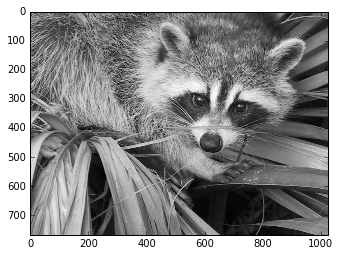

In [29]:
plt.imshow(m_check, cmap='gray')
plt.show()

 Ahora usaremos la SVD para aproximar un rango menor de m. K será 100.
 

In [30]:
k=10

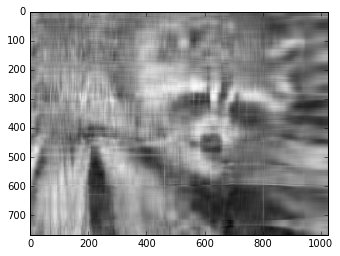

In [31]:

u_r = u[:,:k]
S_r = S[:k,:k]
vt_r = vt[:k,:]

matrix_k = np.matmul(u_r, np.matmul(S_r,vt_r))
plt.imshow(matrix_k, cmap='gray')
plt.show()

Esta descomposición es fundamental cuando se trata de comprimir imágenes. La matriz aproximación K mostrada previamente es una compresión de la matriz original. 

2. Ahora veremos la aplicación a pseudoinversa y sistemas de ecuaciones

In [32]:
# A es una matriz cualquiera.
A = np.array([[1,2,4],[1,4,6],[2,1,6]])
Au, As, Avt = linalg.svd(A, full_matrices=True)
AS = np.diag(As)


In [33]:
Ainv = np.linalg.inv(A)
Au_inv = np.linalg.inv(Au)
As_inv = np.linalg.inv(AS)
Avt_inv = np.linalg.inv(Avt)
print(Au_inv,'\n', As_inv,'\n', Avt_inv)

[[-0.4357909  -0.68120872 -0.58825248]
 [-0.08201973 -0.62080263  0.77966458]
 [-0.89630299  0.38801904  0.21466758]] 
 [[  0.09518203   0.           0.        ]
 [  0.           0.46563432   0.        ]
 [  0.           0.          11.28158345]] 
 [[-0.21830042  0.39881896 -0.89066737]
 [-0.3983053  -0.86961187 -0.29176716]
 [-0.8908972   0.29106464  0.34868834]]


Para Au y Avt, las transpestas son las inversas, en cuanto a S, por ser diagonal, los reciprocos de su diagonal, son la diagonal principal de la inversa de S, siempre y cuando distitnos de cero.

In [34]:
AS = np.diag(np.array([1/x if x != 0 else 0 for x in As]))
AS

array([[  0.09518203,   0.        ,   0.        ],
       [  0.        ,   0.46563432,   0.        ],
       [  0.        ,   0.        ,  11.28158345]])

In [35]:
# Verificación
print(np.dot(Au, Au_inv))
print(np.dot(As, As_inv))
print(np.dot(Avt, Avt_inv))

[[  1.00000000e+00  -5.55111512e-17  -8.32667268e-17]
 [  0.00000000e+00   1.00000000e+00   2.77555756e-17]
 [ -5.55111512e-17  -4.16333634e-17   1.00000000e+00]]
[ 1.  1.  1.]
[[  1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   2.77555756e-17]
 [  0.00000000e+00   2.77555756e-17   1.00000000e+00]]


Por que la definición es muy clara. Si la SVD de $A = U\sum V^{T}$


La pseudoinversa de A, llamemosla $A^{+} = V\sum^{-1}U^{T} $

Multiplicar de esta forma sería un error   $U^{T}\sum^{-1}V$

In [36]:
print(np.dot(Avt_inv,np.dot( As_inv,Au_inv)) )
# Ahora todo va a coincidir
print(np.linalg.pinv(A))
print(Ainv)

[[ 9.  -4.  -2. ]
 [ 3.  -1.  -1. ]
 [-3.5  1.5  1. ]]
[[ 9.  -4.  -2. ]
 [ 3.  -1.  -1. ]
 [-3.5  1.5  1. ]]
[[ 9.  -4.  -2. ]
 [ 3.  -1.  -1. ]
 [-3.5  1.5  1. ]]


Programar una función que dada cualquier matriz devuelva la pseudainversa usando la descomposición SVD. 

In [37]:
def get_pseudoinverse(matrix):
    
    """
    Get pseudo inverse of a matrix
    """
    
    Au, As, Avt = linalg.svd(matrix, full_matrices=False)
    Au_inv = Au.transpose()
    As_inv = np.diag(np.array([1/x if x != 0 else 0 for x in As]))
    Avt_inv = Avt.transpose()
    
    pseudo_matrix = np.dot(Avt_inv,np.dot( As_inv, Au_inv))
    
    return pseudo_matrix

In [38]:
#Verificamos
A = np.array([[1,2,4],[1,4,6],[2,1,6]])
Ainv = get_pseudoinverse(A)
iden = np.dot(A,Ainv)
iden

array([[  1.00000000e+00,  -6.21724894e-15,  -3.55271368e-15],
       [  7.10542736e-15,   1.00000000e+00,  -8.88178420e-16],
       [  1.06581410e-14,  -3.55271368e-15,   1.00000000e+00]])

In [39]:
def solve_system(coefficient_matrix, image_vector):
    
    pseudoinverse = get_pseudoinverse(coefficient_matrix)
    domain_vector = np.dot(pseudoinverse,image_vector)
    
    return domain_vector
    

In [40]:
### Prueba de calidad 
B = np.array([[-10,9],[10,5]])
b = np.array([-9,-5])
print(B,'\n',b)
x = solve_system(B,b)
print(x)
np.dot(B,x)

###### Funciona!!!!!!!!

[[-10   9]
 [ 10   5]] 
 [-9 -5]
[ 0. -1.]


array([-9., -5.])

* Ejercicio 3

In [41]:
A = np.array([[1,1],[0,0]])
A

array([[1, 1],
       [0, 0]])

La imagen de A es el siguiente conjunto $  b \hspace{3mm} x \hspace{3mm} \left(\begin{array}{ccc}  1 \\ 0 \end{array} \right)$ con $b \in \Bbb R$

In [42]:
b = np.array([1,1])

Evidentemente b no esta en la imagen
La solución no trivial al sistema homogeneo es $ x \hspace{3mm} = \hspace{3mm} \left(\begin{array}{ccc}  a \\ -a \end{array} \right)$ con $a \in \Bbb R$

In [43]:
solve_system(A,b)

array([ 0.5,  0.5])

Por la pseudoinversa se encuentra una solución que no es otra cosa más que el vector $b$ proyectado en el espacio generado por la matriz A.

In [44]:
np.linalg.solve(A,b)

LinAlgError: Singular matrix

* La matriz A es singular por definición no tiene inversa. Sin embargo, por
el método de la pseudo inversa podemos aproximarla solución aún cuando no esté en el espacio de la imagen de x o, equivalentemente, el espacio generado por $A$ el método que diseñamos, obtiene la pseudoinversa y aproxima una solución proyectando el vector $b$ sobre el espacio generado por la matriz A. 

* Si usaramos el tradicional de python o R, de obten la inversa, alzaría una excepción del tipo
_Error, la matriz es singular_.


Ahora $ A =  \left( \begin{array}{ccc}
 1 & 1 \\
 0 & 1e-32 \end{array} \right)$ 

In [45]:
A = np.array([[1,1], [0,1e-32]])
A

array([[  1.00000000e+00,   1.00000000e+00],
       [  0.00000000e+00,   1.00000000e-32]])

In [48]:
np.linalg.det(A)

9.9999999999999308e-33

El determinante es distinto de cero, la inversa existe.

In [49]:
b = np.array([2,0])
c = np.array([1,1])

In [50]:
solution_pseudo = solve_system(A,b)
solution_inv = np.linalg.solve(A,b)
print(np.dot(A,solution_pseudo))
print(np.dot(A,solution_inv))


[  2.00000000e+00  -1.11022302e-48]
[ 2.  0.]


In [51]:
solution_pseudo_c = solve_system(A,c)
solution_inv_c = np.linalg.solve(A,c)
print(solution_pseudo_c)
print(solution_inv_c)
#print(np.dot(A,solution_pseudo_c))
print(np.dot(A,solution_inv_c))

[ -1.00000000e+32   1.00000000e+32]
[ -1.00000000e+32   1.00000000e+32]
[ 0.  1.]


El método de la inversa sí encontró una solución, sin embargo, no es el vector (1,1)

In [52]:
print(solution_pseudo_c)
print(np.dot(A,solution_pseudo_c))

[ -1.00000000e+32   1.00000000e+32]
[ 0.  1.]


# El método gradiente descendiente

In [55]:
import pandas as pd

In [56]:
base =pd.read_csv('study_vs_sat.csv')
base.head(5)

,﻿study_hours,sat_score
0,4,390
1,9,580
2,10,650
3,14,730
4,4,410


### Planteamiento del problema de minimización

Sea $ y $ sat_score y la queremos explicar mediante una relación lineal con $ x $ study_hours, 
entonces queremos encontrar $ \alpha , \beta $ tal que para cada observación  aproximamos $ y_i$ con   $ \hat{y}_i = \alpha_i + \beta x_i $


La función de error que deseamos minimizar:  $ E  = \sum\limits_{i=1}^n (y_i - \hat{y}_i )^2 = \sum\limits_{i=1}^n (y_i - \alpha_i + \beta x_i )^2 $


Encontrar $ \alpha $ y $ \beta $ tal que minimizen E. 


Las condiciones de primer orden implican obtener las derivadas parciales con el vector gradiente e igualarlas 0.

Vector Gradiente $$ \nabla F(\alpha,\beta) = (\frac{\partial E}{\partial \alpha},\frac{\partial E}{\partial \beta}) $$

Condiciones de Primer Orden

$$ \frac{\partial E}{\partial \alpha} = -2 * \sum\limits_{i=1}^n (y_i - \alpha_i + \beta x_i )  = 0 $$  
$$ \frac{\partial E}{\partial \beta} =  -2 * \sum\limits_{i=1}^n (y_i - \alpha_i + \beta x_i )*x_i = 0 $$


La siguiente función recibe los parámetros alfa, beta y un numpy array de una dimensión con las horas de estudio y regresa un numpy array con predicciones de la forma $ y_i = \alpha + \beta x_i $

In [53]:
def predict_score( alpha, beta, study_hours):
    
    predictions = np.array([alpha + beta * study_time for study_time in study_hours])
    
    return predictions
    

Definan un numpy array X de dos columnas, la primera con unos en todas sus entradas y la segunda con la variable study_hours. Observen que X*[alpha,beta] nos devuelve alpha + beta*study_hours_i en cada entrada y que entonces el problema se vuelve sat_score ~ X*[alpha,beta]

In [57]:
base =pd.read_csv('study_vs_sat.csv')
base.head(5)
study_hours = base.iloc[:,0]
study_hours = study_hours.values

alpha, beta = 2,3

X_array = np.empty( shape=[20,2], dtype=int)

for i in range(20):
    
    X_array[i] = [1, study_hours[i]]

X_array * [alpha, beta]

array([[ 2, 12],
       [ 2, 27],
       [ 2, 30],
       [ 2, 42],
       [ 2, 12],
       [ 2, 21],
       [ 2, 36],
       [ 2, 66],
       [ 2,  3],
       [ 2,  9],
       [ 2, 24],
       [ 2, 33],
       [ 2, 15],
       [ 2, 18],
       [ 2, 30],
       [ 2, 33],
       [ 2, 48],
       [ 2, 39],
       [ 2, 39],
       [ 2, 30]])

Calculen la pseudoinversa X^+ de X y computen (X^+)*sat_score para obtener alpha y beta soluciones

In [58]:
#La pseudoinversa de X es la siguiente 
X_pseudoinv = get_pseudoinverse(X_array)
X_pseudoinv

array([[ 0.15935874,  0.05902962,  0.0389638 , -0.0412995 ,  0.15935874,
         0.09916127, -0.00116785, -0.2018261 ,  0.21955622,  0.17942457,
         0.07909545,  0.01889797,  0.13929292,  0.11922709,  0.0389638 ,
         0.01889797, -0.08143115, -0.02123368, -0.02123368,  0.0389638 ],
       [-0.01157235, -0.00095552,  0.00116785,  0.00966132, -0.01157235,
        -0.00520225,  0.00541459,  0.02664826, -0.01794246, -0.01369572,
        -0.00307888,  0.00329122, -0.00944899, -0.00732562,  0.00116785,
         0.00329122,  0.01390806,  0.00753796,  0.00753796,  0.00116785]])

In [59]:
sat_score = base['sat_score'].values
solution_vector = np.dot(X_pseudoinv, sat_score)

print('Alfa óptima con pseudoinversa es :',solution_vector[0])
print('\n'*1)
print('Beta óptima con pseudoinversa es :', solution_vector[1])

Alfa óptima con pseudoinversa es : 353.164879499


Beta óptima con pseudoinversa es : 25.3264677779


Comparen la solución anterior con la de la fórmula directa de solución exacta (alpha,beta)=(X^t*X)^(-1)*X^t*sat_score

Resolvamos por partes, queremos 
$((X^{t}X))^{-1}X^{t}$ * study_hours


Sea $ J = ((X^{t}X))^{-1}$

In [60]:

J = np.linalg.inv(np.dot(X_array.transpose(), X_array))
K = np.dot(J, X_array.transpose())
sol_vector = np.dot(K, sat_score)
print('Alfa óptima con inversa tradicional es :',sol_vector[0])
print('\n'*1)
print('Beta óptima con inversa tradicional es :', sol_vector[1])
print('La solución es la misma que con la pseudoinversa')

Alfa óptima con inversa tradicional es : 353.164879499


Beta óptima con inversa tradicional es : 25.3264677779
La solución es la misma que con la pseudoinversa
